## Регрессионный анализ

### Парная регрессия
построение модели 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns
import sklearn.linear_model as lm

pd.options.display.max_rows = 8

In [2]:
df = pd.read_csv("../data/Ap_Rent_2023.csv", sep=';')
df

,rent,s,floor,rooms,district,walls,furniture
0,27500,35.0,5,1,3,1,1
1,29800,31.0,2,1,2,0,1
2,32000,30.0,4,1,3,1,1
3,50000,55.0,1,2,3,1,1
...,...,...,...,...,...,...,...
126,47800,54.0,1,2,1,1,1
127,34200,54.0,3,2,2,0,1
128,20800,12.0,4,1,3,1,0
129,34200,68.0,4,2,2,0,1


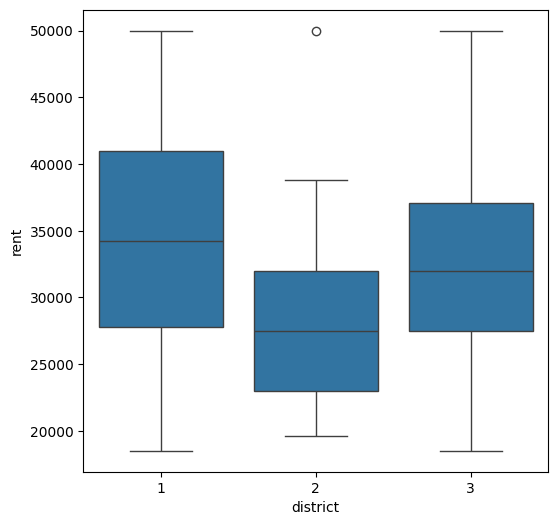

In [3]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='district', y='rent', data=df)

In [4]:
df.loc[(df['rent'] == 50000) & (df['district'] == 2)]

,rent,s,floor,rooms,district,walls,furniture
37,50000,64.0,3,3,2,0,1


In [ ]:
df=df.drop(df.index[[37]])

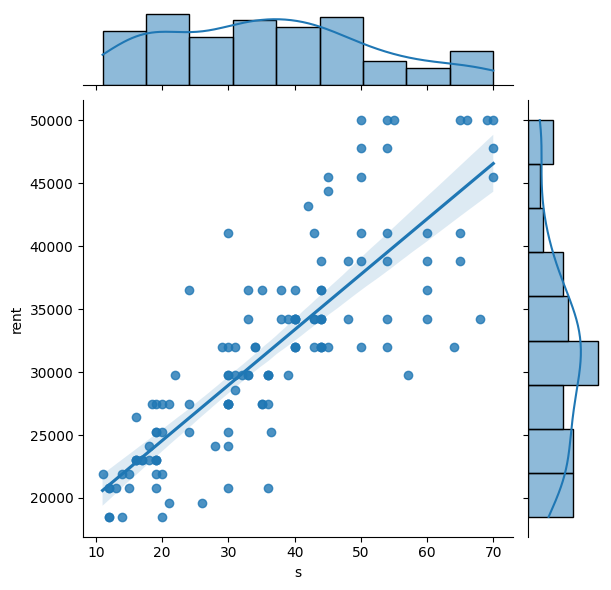

In [7]:
#sns.set(style="darkgrid")
sns.jointplot(x='s', y='rent', data=df, kind="reg")

In [8]:
LR = lm.LinearRegression()

In [9]:
mod1 = LR.fit(df[['s']],df[['rent']])

In [10]:
mod1.intercept_, mod1.coef_

(array([15761.02115325]), array([[439.90675809]]))

In [11]:
r2 = mod1.score(df[['s']],df[['rent']])
r2

0.6875072638594368

## Парная регрессия (OLS). Статистический подход.

In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [13]:
results1 = smf.ols('rent ~ s', data=df).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     279.4
Date:                Sun, 29 Jun 2025   Prob (F-statistic):           7.10e-34
Time:                        18:56:42   Log-Likelihood:                -1271.5
No. Observations:                 129   AIC:                             2547.
Df Residuals:                     127   BIC:                             2553.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.576e+04   1037.627     15.189      0.000    1.37e+04    1.78e+04
s            439.9068     26.317     16.716      0.000     387.830     491.984
==============================================================================
Omnibus:                        4.021   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                3.935
Skew:                           0.234   Prob(JB):                        0.140
Kurtosis:                       3.716   Cond. No.                         99.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Prob (F-statistic):	7.10e-34 
pvalue очень маленькое, следовательно мы можем очень надежно отклонить гипотезу о неадекватности модели
=> наша модель адекватна

### Влияние количества комнат на арендную плату

In [14]:
results2 = smf.ols('rent ~ rooms', data=df).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     68.74
Date:                Sun, 29 Jun 2025   Prob (F-statistic):           1.38e-13
Time:                        19:49:28   Log-Likelihood:                -1318.6
No. Observations:                 129   AIC:                             2641.
Df Residuals:                     127   BIC:                             2647.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.05e+04   1473.688     13.912      0.000    1.76e+04    2.34e+04
rooms       8205.7283    989.731      8.291      0.000    6247.229    1.02e+04
==============================================================================
Omnibus:                        4.039   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.133   Jarque-Bera (JB):                3.639
Skew:                           0.405   Prob(JB):                        0.162
Kurtosis:                       3.139   Cond. No.                         5.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Влияние этажа на арендную плату

In [15]:
results3 = smf.ols('rent ~ floor', data=df).fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     17.83
Date:                Sun, 29 Jun 2025   Prob (F-statistic):           4.56e-05
Time:                        19:56:05   Log-Likelihood:                -1338.0
No. Observations:                 129   AIC:                             2680.
Df Residuals:                     127   BIC:                             2686.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.719e+04   1268.009     21.446      0.000    2.47e+04    2.97e+04
floor       1081.7688    256.156      4.223      0.000     574.882    1588.656
==============================================================================
Omnibus:                       10.968   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.832
Skew:                           0.742   Prob(JB):                      0.00270
Kurtosis:                       3.042   Cond. No.                         9.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Нелинейные модели

In [18]:
df = pd.read_csv("../data/Non_lin UTF.csv", sep=';')
df

,Income,Expense
0,103,38.8
1,107,38.5
2,110,39.3
3,112,40.0
...,...,...
16,139,41.7
17,140,41.1
18,142,41.0
19,150,42.4


# Предварительная обработка

## Гистограммы

<Axes: >

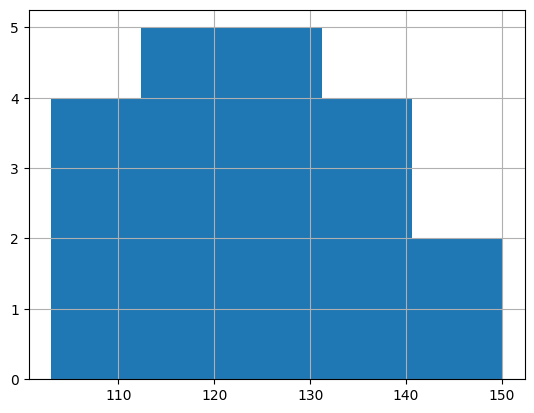

In [19]:
df['Income'].hist(bins=5)

<Axes: >

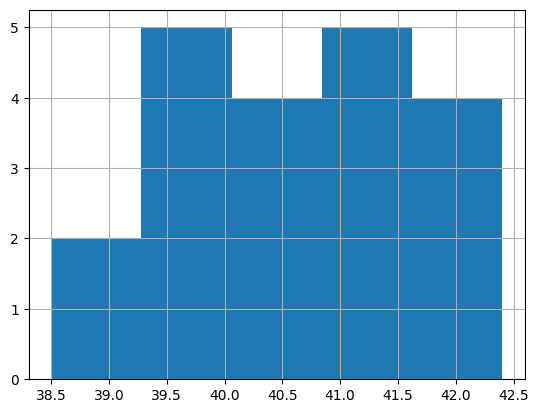

In [20]:
df['Expense'].hist(bins=5)

In [21]:
df.describe()

,Income,Expense
count,20.00000,20.000000
mean,124.05000,40.605000
std,12.96341,1.079218
min,103.00000,38.500000
25%,114.50000,39.925000
50%,122.50000,40.750000
75%,134.25000,41.175000
max,150.00000,42.400000


In [22]:
df.mean() # среднее

Income     124.050
Expense     40.605
dtype: float64

In [23]:
df.std()  # средне квадратическое отклонение

Income     12.963410
Expense     1.079218
dtype: float64

In [24]:
df.skew() # коэффициент асимметрии

Income     0.331202
Expense   -0.322734
dtype: float64

In [25]:
df.kurtosis() # коэффициент эксцесса

Income    -0.761112
Expense   -0.538070
dtype: float64

## Проверка нормальности по критерию Шапиро-Уилка

In [26]:
stats.shapiro(df['Income'])

ShapiroResult(statistic=np.float64(0.9689613527794745), pvalue=np.float64(0.7328040472268101))

In [27]:
stats.shapiro(df['Expense'])

ShapiroResult(statistic=np.float64(0.9684593376603265), pvalue=np.float64(0.7220629561081846))

## Корреляционный анализ

<Axes: xlabel='Income', ylabel='Expense'>

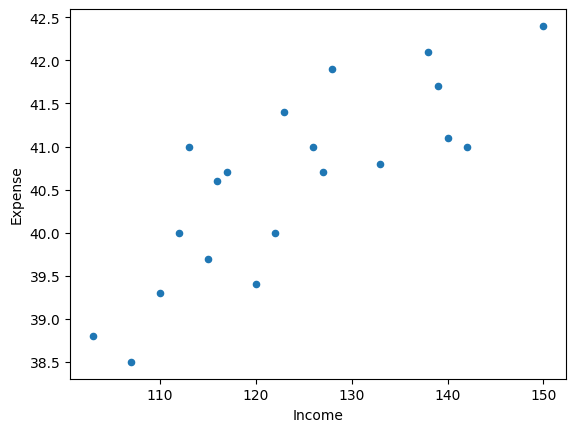

In [28]:
df.plot("Income",'Expense',kind="scatter")

In [29]:
df.corr(method='pearson') # количественная корреляция Пирсона

,Income,Expense
Income,1.000000,0.807681
Expense,0.807681,1.000000


In [30]:
df.corr() # то же самое

,Income,Expense
Income,1.000000,0.807681
Expense,0.807681,1.000000


In [31]:
scipy.stats.pearsonr(df.Income, df.Expense)

PearsonRResult(statistic=np.float64(0.8076813796180543), pvalue=np.float64(1.6610162287569093e-05))

# Регрессионный анализ

## Линейная модель

$$ y = a + b \cdot x + \epsilon $$
$$ \hat{y} = \hat{a} + \hat{b} \cdot x $$

In [32]:
Y=np.array(df.Expense).reshape((-1, 1))
X=np.array(df.Income).reshape((-1, 1))

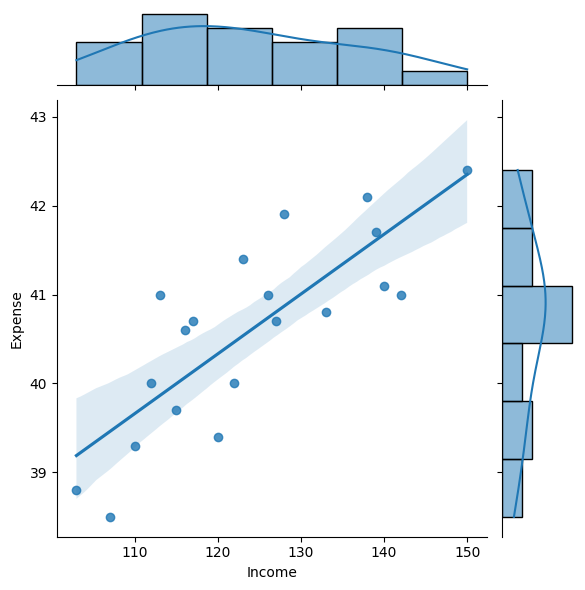

In [34]:
#sns.set(style="darkgrid")
sns.jointplot(x='Income', y='Expense', data=df, kind="reg")

In [35]:
results_lin = smf.ols('Y ~ X', data=df).fit()
results_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     33.78
Date:                Sun, 29 Jun 2025   Prob (F-statistic):           1.66e-05
Time:                        20:30:27   Log-Likelihood:                -18.825
No. Observations:                  20   AIC:                             41.65
Df Residuals:                      18   BIC:                             43.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.2638      1.443     22.364      0.000      29.233      35.295
X              0.0672      0.012      5.812      0.000       0.043       0.092
==============================================================================
Omnibus:                        1.482   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.477   Jarque-Bera (JB):                0.987
Skew:                           0.216   Prob(JB):                        0.610
Kurtosis:                       2.001   Cond. No.                     1.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Метрики качества
Коэффициент детерминации
$$ R^2=1-\frac{\sum{(y_i-\hat y_i)^2}}{\sum{(y_i-\bar y)^2}}=\frac{\sum{(\hat y_i-\bar y)^2}}{\sum{(y_i-\bar y)^2}} $$

Ошибка аппроксимации
$$ A=\frac{1}{n}\sum{\left|\frac{y_i-\hat y_i}{y_i}\right|}\cdot100 \% $$


In [36]:
LR = lm.LinearRegression()

In [37]:
#mod_lin = LR.fit(df[['Income']],df[['Expense']])
mod_lin = LR.fit(X,Y)

In [38]:
mod_lin.intercept_, mod_lin.coef_

(array([32.26383752]), array([[0.06724033]]))

In [39]:
r2_lin = mod_lin.score(X,Y)
r2_lin

0.6523492109817238

In [40]:
Y_lin=mod_lin.predict(X)

In [41]:
Y.transpose()

array([[38.8, 38.5, 39.3, 40. , 41. , 39.7, 40.6, 40.7, 39.4, 40. , 41.4,
        41. , 40.7, 41.9, 40.8, 42.1, 41.7, 41.1, 41. , 42.4]])

In [42]:
Y_lin.transpose()

array([[39.18959113, 39.45855244, 39.66027341, 39.79475407, 39.86199439,
        39.99647505, 40.06371537, 40.1309557 , 40.33267668, 40.46715733,
        40.53439766, 40.73611864, 40.80335896, 40.87059929, 41.20680092,
        41.54300255, 41.61024288, 41.67748321, 41.81196386, 42.34988647]])

In [60]:
n=20
A_lin=100*(abs((Y-Y_lin)/Y)/n).sum()
A_lin
# ошибка аппроксимации меньше 8% => модель хорошая

np.float64(1.3092216263089103)

In [61]:
R2_lin = r2_lin 
R2_lin

0.6523492109817238

## Степенная модель

$$ y = a x^b  \epsilon $$
$$ ln(y) = ln(a) + b \cdot ln(x) + ln(\epsilon) $$
$$ \hat{a} = exp(\hat{ln(a)}) $$
$$ \hat{y} = \hat{a}x^{ \hat{b}} $$

In [45]:
LX=np.log(X)
LY=np.log(Y)

In [46]:
data=pd.DataFrame(np.hstack([X,Y,LX,LY]), columns=['X','Y','LX','LY'])
data

,X,Y,LX,LY
0,103.0,38.8,4.634729,3.658420
1,107.0,38.5,4.672829,3.650658
2,110.0,39.3,4.700480,3.671225
3,112.0,40.0,4.718499,3.688879
...,...,...,...,...
16,139.0,41.7,4.934474,3.730501
17,140.0,41.1,4.941642,3.716008
18,142.0,41.0,4.955827,3.713572
19,150.0,42.4,5.010635,3.747148


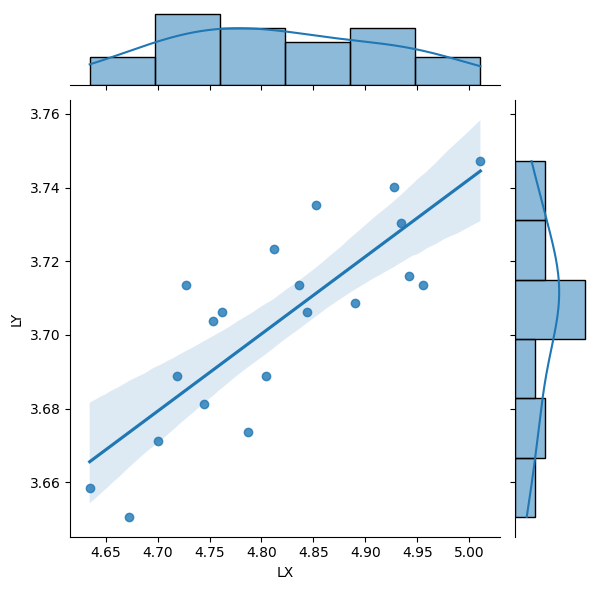

In [47]:
sns.jointplot(x='LX', y='LY', data=data, kind="reg")

In [48]:
results_pow = smf.ols('LY ~ LX', data=df).fit()
results_pow.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     LY   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     35.68
Date:                Sun, 29 Jun 2025   Prob (F-statistic):           1.19e-05
Time:                        20:33:47   Log-Likelihood:                 55.525
No. Observations:                  20   AIC:                            -107.1
Df Residuals:                      18   BIC:                            -105.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6933      0.169     15.922      0.000       2.338       3.049
LX             0.2098      0.035      5.974      0.000       0.136       0.284
==============================================================================
Omnibus:                        1.240   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.895
Skew:                           0.191   Prob(JB):                        0.639
Kurtosis:                       2.037   Cond. No.                         239.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
mod_pow = LR.fit(LX,LY)

In [50]:
r2_pow = mod_pow.score(LX,LY)
r2_pow

0.6647029603480158

In [51]:
Y_pow=mod_pow.predict(LX)

In [52]:
Y_pow.transpose()

array([[3.6656198 , 3.67361265, 3.67941358, 3.68319363, 3.68505841,
        3.68873898, 3.69055533, 3.69235609, 3.69766743, 3.70113506,
        3.70284762, 3.70790297, 3.70956137, 3.71120677, 3.71924556,
        3.72698766, 3.72850237, 3.73000623, 3.73298198, 3.74448003]])

In [53]:
Y_pow=np.exp(Y_pow)
Y_pow.transpose()

array([[39.08035076, 39.39396578, 39.62315151, 39.77321231, 39.84745   ,
        39.99438142, 40.06709116, 40.13930727, 40.35306815, 40.49324061,
        40.56264695, 40.76822457, 40.83589082, 40.90313734, 41.23327452,
        41.55374533, 41.61673505, 41.67936768, 41.80357982, 42.28701346]])

In [54]:
A_pow=100*(abs((Y-Y_pow)/Y)/n).sum(); 
print (A_lin.round(4), A_pow.round(4))

1.3092 1.2912


In [58]:
RSS = ((Y-Y_pow)**2).sum()
TSS = ((Y-Y.mean())**2).sum()
R2_pow = 1 - RSS/TSS 
print (round(R2_lin, 4), round(R2_pow, 4))

0.6523 0.6632


## Экспоненциальная модель

$$ y = a e^{bx}  \epsilon $$
$$ ln(y) = ln(a) + b x + ln(\epsilon) $$
$$ \hat{a} = exp(\hat{ln(a)}) $$
$$ \hat{y} = \hat{a}e^{ \hat{b}x} $$

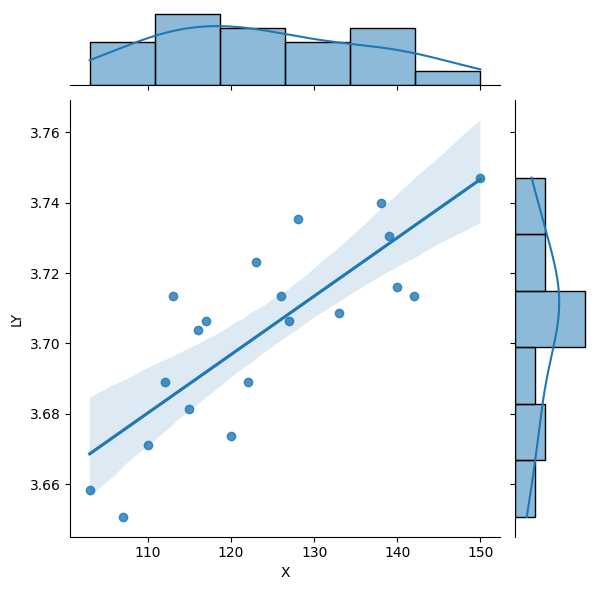

In [74]:
sns.jointplot(x='X', y='LY', data=data, kind="reg")
# ухадшилась модель, так как у экспоненты выпуклость вниз, широкий интервал на графике

In [64]:
results_exp = smf.ols('LY ~ X', data=df).fit()
results_exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     LY   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     33.48
Date:                Sun, 29 Jun 2025   Prob (F-statistic):           1.75e-05
Time:                        23:24:17   Log-Likelihood:                 55.106
No. Observations:                  20   AIC:                            -106.2
Df Residuals:                      18   BIC:                            -104.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4975      0.036     97.723      0.000       3.422       3.573
X              0.0017      0.000      5.786      0.000       0.001       0.002
==============================================================================
Omnibus:                        1.382   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.501   Jarque-Bera (JB):                0.948
Skew:                           0.204   Prob(JB):                        0.623
Kurtosis:                       2.015   Cond. No.                     1.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
mod_exp = LR.fit(X,LY)

In [66]:
r2_exp = mod_exp.score(X,LY)
r2_exp

0.6503618589937877

In [68]:
Y_exp=mod_exp.predict(X)
Y_exp.transpose()

array([[3.66859274, 3.67523615, 3.68021871, 3.68354041, 3.68520126,
        3.68852297, 3.69018382, 3.69184467, 3.69682723, 3.70014893,
        3.70180978, 3.70679234, 3.70845319, 3.71011404, 3.7184183 ,
        3.72672256, 3.72838341, 3.73004426, 3.73336597, 3.74665278]])

In [69]:
Y_exp=np.exp(Y_exp)
Y_exp.transpose()

array([[39.19670722, 39.45797381, 39.65506596, 39.78700735, 39.85314258,
        39.98574302, 40.0522086 , 40.11878466, 40.31917755, 40.4533286 ,
        40.52057141, 40.72297123, 40.79066225, 40.85846578, 41.1991778 ,
        41.54273096, 41.61178461, 41.68095305, 41.81963503, 42.37899259]])

In [70]:
A_exp=100*(abs((Y-Y_exp)/Y)/n).sum(); 
print (A_lin.round(4), A_pow.round(4), A_exp.round(4))

1.3092 1.2912 1.3096


In [72]:
RSS = ((Y-Y_exp)**2).sum()
TSS = ((Y-Y.mean())**2).sum()
R2_exp = 1 - RSS/TSS 
print (round(R2_lin, 4), round(R2_pow, 4), round(R2_exp, 4))

0.6523 0.6632 0.6492


## Параболическая модель

$$ y = a + b \sqrt {x} + \epsilon $$
$$ \hat{y} = \hat{a} + \hat{b} \sqrt {x} $$

In [75]:
SX=np.sqrt(X)

In [76]:
data[['SX']]=SX
data

,X,Y,LX,LY,SX
0,103.0,38.8,4.634729,3.658420,10.148892
1,107.0,38.5,4.672829,3.650658,10.344080
2,110.0,39.3,4.700480,3.671225,10.488088
3,112.0,40.0,4.718499,3.688879,10.583005
...,...,...,...,...,...
16,139.0,41.7,4.934474,3.730501,11.789826
17,140.0,41.1,4.941642,3.716008,11.832160
18,142.0,41.0,4.955827,3.713572,11.916375
19,150.0,42.4,5.010635,3.747148,12.247449


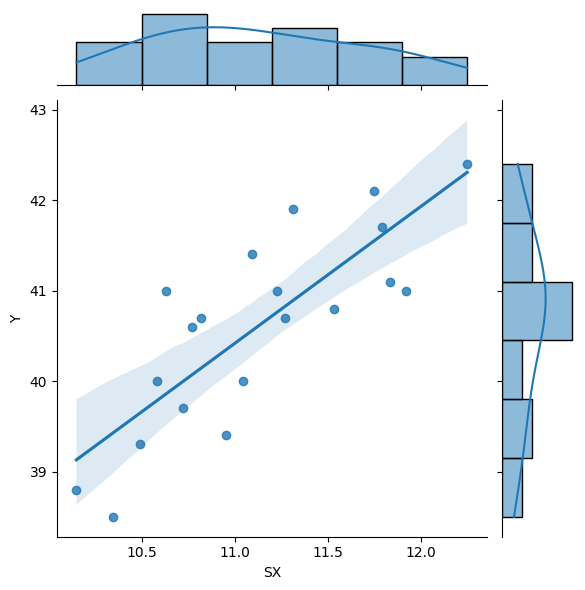

In [78]:
sns.jointplot(x='SX', y='Y', data=data, kind="reg")

In [79]:
results_par = smf.ols('Y ~ SX', data=df).fit()
results_par.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     34.85
Date:                Sun, 29 Jun 2025   Prob (F-statistic):           1.37e-05
Time:                        23:44:37   Log-Likelihood:                -18.619
No. Observations:                  20   AIC:                             41.24
Df Residuals:                      18   BIC:                             43.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.7734      2.855      8.328      0.000      17.776      29.771
SX             1.5132      0.256      5.904      0.000       0.975       2.052
==============================================================================
Omnibus:                        1.415   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.493   Jarque-Bera (JB):                0.962
Skew:                           0.209   Prob(JB):                        0.618
Kurtosis:                       2.010   Cond. No.                         222.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
mod_par = LR.fit(SX,Y)

In [81]:
r2_par = mod_par.score(SX,Y)
r2_par

0.6594390478344883

In [82]:
Y_par=mod_par.predict(SX)
Y_par.transpose()

array([[39.13031831, 39.4256715 , 39.64357961, 39.78720444, 39.85853596,
        40.00025831, 40.07065734, 40.14075357, 40.34926382, 40.48682556,
        40.55518358, 40.75860706, 40.82587563, 40.89287989, 41.2240425 ,
        41.54903659, 41.61332497, 41.6773825 , 41.80481488, 42.30578399]])

In [83]:
A_par=100*(abs((Y-Y_par)/Y)/n).sum(); 
print (A_lin.round(4), A_pow.round(4), A_exp.round(4), A_par.round(4))

1.3092 1.2912 1.3096 1.2997


In [85]:
R2_par=r2_par
print (round(R2_lin, 4), round(R2_pow, 4), round(R2_exp, 4), round(R2_par, 4))

0.6523 0.6632 0.6492 0.6594


## Логарифмическая модель

$$ y = a + b \cdot ln(x) + \epsilon $$
$$ \hat{y} = \hat{a} + \hat{b} \cdot ln(x) $$

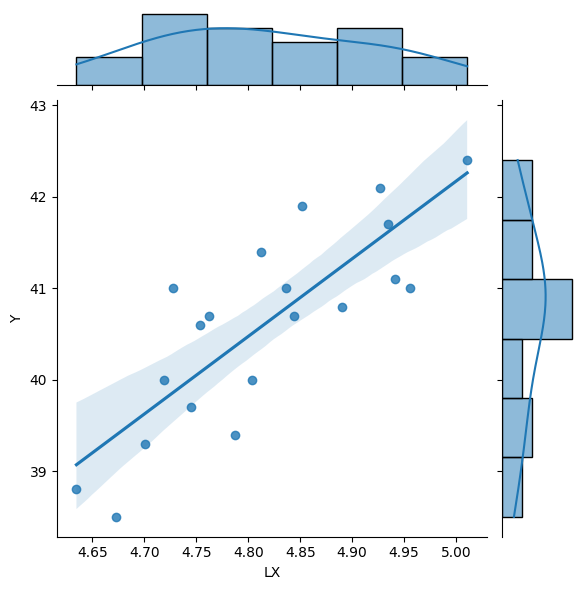

In [87]:
sns.jointplot(x='LX', y='Y', data=data, kind="reg")

In [88]:
results_log = smf.ols('Y ~ LX', data=df).fit()
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     35.87
Date:                Sun, 29 Jun 2025   Prob (F-statistic):           1.15e-05
Time:                        23:46:48   Log-Likelihood:                -18.428
No. Observations:                  20   AIC:                             40.86
Df Residuals:                      18   BIC:                             42.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2690      6.826     -0.039      0.969     -14.609      14.071
LX             8.4879      1.417      5.989      0.000       5.511      11.465
==============================================================================
Omnibus:                        1.340   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.512   Jarque-Bera (JB):                0.931
Skew:                           0.198   Prob(JB):                        0.628
Kurtosis:                       2.020   Cond. No.                         239.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

получился очень сильно не значимый один параметр по Стьюденту 	P>|t| (pvalue) = 0.969 
интервал почти симметрично накрывает 0 [0.025	0.975] == -14.609	14.071
почти однозначно можно сказать, что этот параметр в модели не нужен
=> надо посчитать без интерсепта (Intercept)
то есть в нашей модели $\hat{a} $ нам не нужна, остается  $\hat{y} = \hat{b} \cdot ln(x)$

In [ ]:
# results_log = smf.ols('Y ~ LX - 1', data=df).fit() # возможно и такая запись
results_log = smf.ols('Y ~ LX + 0', data=df).fit()
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      Y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          8.477e+04
Date:                Sun, 29 Jun 2025   Prob (F-statistic):                    3.85e-36
Time:                        23:47:03   Log-Likelihood:                         -18.429
No. Observations:                  20   AIC:                                      38.86
Df Residuals:                      19   BIC:                                      39.85
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
LX             8.4321      0.029    291.150      0.000       8.371       8.493
==============================================================================
Omnibus:                        1.359   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.507   Jarque-Bera (JB):                0.934
Skew:                           0.194   Prob(JB):                        0.627
Kurtosis:                       2.015   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

кажется как будто идеальная модель!! но!
по комментарию видно что коэфф детерминации был посчитан по другой формуле
следовательно, это не верно что мы получили самую лучшую функиональную модель
это значит, что нам надо пересчитать коэфф детерминации!
модель нормальная, но коэф детерм надо пересчитать

## Коэффициент детерминации
В модели со свободным членом
$$ R^2=1-\frac{\sum{(y_i-\hat y_i)^2}}{\sum{(y_i-\bar y)^2}}=\frac{\sum{(\hat y_i-\bar y)^2}}{\sum{(y_i-\bar y)^2}} $$

В модели без свободного члена
$$ R^2=\frac{\sum{\hat y_i^2}}{\sum{y_i^2}} $$

In [93]:
LR0=lm.LinearRegression(fit_intercept=False) # без свободного членаб интерфепта

In [91]:
mod_log = LR0.fit(LX,Y)
r2_log = mod_log.score(LX,Y)
r2_log

0.6658583690660848

In [94]:
Y_log=mod_log.predict(LX)
Y_log.transpose()

array([[39.08042114, 39.40168222, 39.63484223, 39.78677577, 39.86172812,
        40.0096632 , 40.08266871, 40.15504755, 40.36852942, 40.50790587,
        40.57673958, 40.77993215, 40.84658928, 40.91272361, 41.23583146,
        41.54701376, 41.6078955 , 41.6683408 , 41.78794682, 42.25009444]])

In [95]:
A_log=100*(abs((Y-Y_log)/Y)/n).sum(); 
print (A_lin.round(4), A_pow.round(4), A_exp.round(4), A_par.round(4), A_log.round(4))

1.3092 1.2912 1.3096 1.2997 1.2925


In [97]:
R2_log=r2_log
print (round(R2_lin, 4), round(R2_pow, 4), round(R2_exp, 4), round(R2_par, 4), round(R2_log, 4))

0.6523 0.6632 0.6492 0.6594 0.6659


## Гиперболическая модель

$$ y = a + \frac {b}{x} + \epsilon $$
$$ \hat{y} = \hat{a} + \frac{\hat{b}}{x} $$

In [98]:
X1=1/X

In [99]:
data[['X1']]=X1
data

,X,Y,LX,LY,SX,X1
0,103.0,38.8,4.634729,3.658420,10.148892,0.009709
1,107.0,38.5,4.672829,3.650658,10.344080,0.009346
2,110.0,39.3,4.700480,3.671225,10.488088,0.009091
3,112.0,40.0,4.718499,3.688879,10.583005,0.008929
...,...,...,...,...,...,...
16,139.0,41.7,4.934474,3.730501,11.789826,0.007194
17,140.0,41.1,4.941642,3.716008,11.832160,0.007143
18,142.0,41.0,4.955827,3.713572,11.916375,0.007042
19,150.0,42.4,5.010635,3.747148,12.247449,0.006667


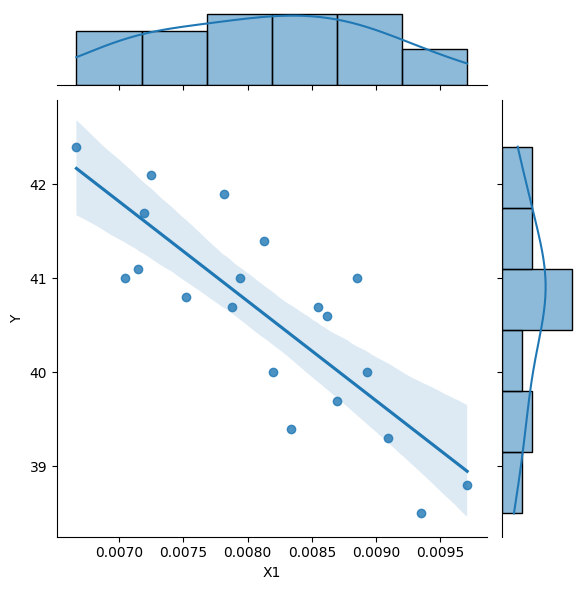

In [101]:
sns.jointplot(x='X1', y='Y', data=data, kind="reg")

In [102]:
results_hyp = smf.ols('Y ~ X1', data=df).fit()
results_hyp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     37.67
Date:                Mon, 30 Jun 2025   Prob (F-statistic):           8.51e-06
Time:                        00:01:35   Log-Likelihood:                -18.099
No. Observations:                  20   AIC:                             40.20
Df Residuals:                      18   BIC:                             42.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.2276      1.412     34.867      0.000      46.261      52.194
X1         -1058.7599    172.498     -6.138      0.000   -1421.164    -696.356
==============================================================================
Omnibus:                        1.194   Durbin-Watson:                   2.162
Prob(Omnibus):                  0.550   Jarque-Bera (JB):                0.862
Skew:                           0.162   Prob(JB):                        0.650
Kurtosis:                       2.036   Cond. No.                     1.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:
mod_hyp = LR.fit(X1,Y)

In [104]:
r2_hyp = mod_hyp.score(X1,Y)
r2_hyp

0.676682926118884

In [105]:
Y_hyp=mod_hyp.predict(X1)
Y_hyp.transpose()

array([[38.94838589, 39.33265587, 39.6025182 , 39.77439481, 39.85805156,
        40.02100037, 40.10036767, 40.17837827, 40.40460902, 40.54924834,
        40.61980411, 40.82475182, 40.89091604, 40.95604645, 41.26700741,
        41.55543496, 41.61063045, 41.66503743, 41.77155251, 42.1692088 ]])

In [106]:
A_hyp=100*(abs((Y-Y_hyp)/Y)/n).sum()
print (A_lin.round(4), A_pow.round(4), A_exp.round(4), A_par.round(4), A_log.round(4), A_hyp.round(4))

1.3092 1.2912 1.3096 1.2997 1.2925 1.2698


In [107]:
R2_hyp=r2_hyp
print (round(R2_lin, 4), round(R2_pow, 4), round(R2_exp, 4), round(R2_par, 4), round(R2_log, 4), round(R2_hyp, 4))

0.6523 0.6632 0.6492 0.6594 0.6659 0.6767


## Сравнение моделей

In [110]:
mes = pd.DataFrame(np.array([['Линейная', round(R2_lin, 4),A_lin.round(4)],
                             ['Степенная', round(R2_pow, 4),A_pow.round(4)],
                             ['Экспоненциальная', round(R2_exp, 4),A_exp.round(4)],
                             ['Параболическая', round(R2_par, 4),A_par.round(4)],
                             ['Логарифмическая', round(R2_log, 4),A_log.round(4)],
                             ['Гиперболическая', round(R2_hyp, 4),A_hyp.round(4)]]),
                   columns=['Модель','Коэффициент деретминации','Ошибка аппроксимации'])
mes=mes.set_index('Модель')
mes

,Коэффициент деретминации,Ошибка аппроксимации
Модель,,
Линейная,0.6523,1.3092
Степенная,0.6632,1.2912
Экспоненциальная,0.6492,1.3096
Параболическая,0.6594,1.2997
Логарифмическая,0.6659,1.2925
Гиперболическая,0.6767,1.2698


## Прогноз

In [111]:
X.transpose()

array([[103, 107, 110, 112, 113, 115, 116, 117, 120, 122, 123, 126, 127,
        128, 133, 138, 139, 140, 142, 150]])

In [112]:
Xnew = pd.DataFrame(np.array([[111], [145]]))

#### Для лучшей (гиперболической) модели

In [113]:
X1new=1/Xnew
mod_hyp = LR.fit(X1,Y)
mod_hyp.predict(X1new).round(3)

array([[39.689],
       [41.926]])

#### Для логарифмической модели

In [ ]:
LXnew=np.log(Xnew)
mod_log = LR0.fit(LX,Y) # так как мы не используем свободный член, без интерсепта
mod_log.predict(LXnew).round(3)

array([[39.711],
       [41.964]])

#### Для мультипликативной степенной модели

In [115]:
mod_pow = LR.fit(LX,LY)
mod_pow.predict(LXnew).round(3)

array([[3.681],
       [3.737]])

In [116]:
np.exp(mod_pow.predict(LXnew)).round(3)

array([[39.698],
       [41.987]])

## Визуализация

In [117]:
pred = data=pd.DataFrame(np.hstack([X,Y,Y_lin,Y_hyp]))
pred.columns=['X','Y','Y_lin','Y_hyp']
pred

,X,Y,Y_lin,Y_hyp
0,103.0,38.8,39.189591,38.948386
1,107.0,38.5,39.458552,39.332656
2,110.0,39.3,39.660273,39.602518
3,112.0,40.0,39.794754,39.774395
...,...,...,...,...
16,139.0,41.7,41.610243,41.610630
17,140.0,41.1,41.677483,41.665037
18,142.0,41.0,41.811964,41.771553
19,150.0,42.4,42.349886,42.169209


In [118]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=pred.X, y=pred.Y, mode='markers', name='Expense'))
fig.add_trace(go.Scatter(x=pred.X, y=pred.Y_lin, mode='lines', name='Lin_model'))
fig.add_trace(go.Scatter(x=pred.X, y=pred.Y_hyp, mode='lines', name='Hyp_model'))
fig.show()

## МНОЖЕСТВЕННАЯ РЕГРЕССИЯ

In [120]:
df = pd.read_csv("../data/Ap_Rent_2023.csv", sep=';')
df

,rent,s,floor,rooms,district,walls,furniture
0,27500,35.0,5,1,3,1,1
1,29800,31.0,2,1,2,0,1
2,32000,30.0,4,1,3,1,1
3,50000,55.0,1,2,3,1,1
...,...,...,...,...,...,...,...
126,47800,54.0,1,2,1,1,1
127,34200,54.0,3,2,2,0,1
128,20800,12.0,4,1,3,1,0
129,34200,68.0,4,2,2,0,1


In [123]:
df.loc[(df['rent'] == 50000) & (df['district'] == 2)]
df=df.drop(df.index[[37]])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129 entries, 0 to 129
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rent       129 non-null    int64  
 1   s          129 non-null    float64
 2   floor      129 non-null    int64  
 3   rooms      129 non-null    int64  
 4   district   129 non-null    int64  
 5   walls      129 non-null    int64  
 6   furniture  129 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 8.1 KB


In [124]:
X=df[['s','rooms','floor','walls','furniture']]
X

,s,rooms,floor,walls,furniture
0,35.0,1,5,1,1
1,31.0,1,2,0,1
2,30.0,1,4,1,1
3,55.0,2,1,1,1
...,...,...,...,...,...
126,54.0,2,1,1,1
127,54.0,2,3,0,1
128,12.0,1,4,1,0
129,68.0,2,4,0,1


In [125]:
Y=df[['rent']]
mod_m = LR.fit(X,Y)
mod_m.intercept_, mod_m.coef_

(array([12722.79887587]),
 array([[ 436.96292374, -177.1438411 ,  -20.12818464, 2646.18795355,
         2184.98723122]]))

получились отрицательные коэфф, это странно, по логике такого в данной задаче не должно быть
оказывается, это из-за того что в есть мультиколлениарность (из-за сильной связи комнат с площадью, площадь взяла на себя всю нагрузку в функциональной зависимости и влияние кол комнат совсем ослабло)
это ошибка, которую желательно сразу отследить на этапе постройки модели

Лучше проверить каждый предиктор

In [126]:
r2 = mod_m.score(X,Y)
r2

0.7197984795575015

In [127]:
x_new_app = [[54,2,5,1,1]]

In [128]:
y_new_app=mod_m.predict(x_new_app)
print("Прогноз цены: ",y_new_app.round(0))

Прогноз цены:  [[40695.]]


/Users/elenko/pyprojects/pandas_venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



### Множественная регрессия (OLS)

In [129]:
resultsm = smf.ols('rent ~ s + rooms + floor + walls + furniture' , data=df).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     63.19
Date:                Mon, 30 Jun 2025   Prob (F-statistic):           2.41e-32
Time:                        00:44:46   Log-Likelihood:                -1264.4
No. Observations:                 129   AIC:                             2541.
Df Residuals:                     123   BIC:                             2558.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.272e+04   1402.121      9.074      0.000    9947.385    1.55e+04
s            436.9629     43.157     10.125      0.000     351.537     522.389
rooms       -177.1438    993.306     -0.178      0.859   -2143.332    1789.044
floor        -20.1282    166.039     -0.121      0.904    -348.793     308.537
walls       2646.1880    823.063      3.215      0.002    1016.984    4275.392
furniture   2184.9872   1169.265      1.869      0.064    -129.502    4499.476
==============================================================================
Omnibus:                        0.279   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.870   Jarque-Bera (JB):                0.094
Skew:                           0.057   Prob(JB):                        0.954
Kurtosis:                       3.066   Cond. No.                         163.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

floor	-20.1282	166.039	-0.121	0.904

rooms	-177.1438	993.306	-0.178	0.859

этажи и комнаты показывают статистич не значимость

нулевые гипотезы принимаем, коэфф для этих предикторов должны быть = 0

еще значимость корреляции можно понять по доверит интервалу

* если обе границы положительные, то корреляция -- значимая прямая
* если обе границы отрицательные, то корреляция -- значимая обратная 
* если одна положительная, другая отрицательная, то есть интервал накрывает 0, то связи нет

этаж точно убираем

комнаты, надо еще подумать, потому что возможно есть мультиколлинеарность

!!

убирать параметры из модели по одному! может получиться что изменится значимость других параметров!

для 
furniture	2184.9872	1169.265	1.869	0.064

под вопросом, так как pvalue на границе и значение коэфф достаточно большое

---
Prob(JB):	0.954 
=> оснований отклонить гипотезу о нормальности нет (остатки нормальные)

In [130]:
resultsm = smf.ols('rent ~ s + rooms + walls + furniture' , data=df).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     79.62
Date:                Mon, 30 Jun 2025   Prob (F-statistic):           2.54e-33
Time:                        00:45:37   Log-Likelihood:                -1264.4
No. Observations:                 129   AIC:                             2539.
Df Residuals:                     124   BIC:                             2553.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.269e+04   1364.609      9.297      0.000    9985.716    1.54e+04
s            434.7689     39.022     11.142      0.000     357.533     512.005
rooms       -151.1137    965.959     -0.156      0.876   -2063.016    1760.789
walls       2639.9891    818.203      3.227      0.002    1020.536    4259.443
furniture   2185.1790   1164.609      1.876      0.063    -119.909    4490.267
==============================================================================
Omnibus:                        0.330   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.848   Jarque-Bera (JB):                0.129
Skew:                           0.068   Prob(JB):                        0.937
Kurtosis:                       3.075   Cond. No.                         159.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
resultsm = smf.ols('rent ~ s + walls + furniture' , data=df).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     107.0
Date:                Mon, 30 Jun 2025   Prob (F-statistic):           2.28e-34
Time:                        00:45:47   Log-Likelihood:                -1264.4
No. Observations:                 129   AIC:                             2537.
Df Residuals:                     125   BIC:                             2548.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.262e+04   1301.168      9.703      0.000       1e+04    1.52e+04
s            430.4937     27.746     15.515      0.000     375.581     485.407
walls       2646.4127    813.977      3.251      0.001    1035.450    4257.375
furniture   2192.9019   1159.013      1.892      0.061    -100.929    4486.733
==============================================================================
Omnibus:                        0.337   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.845   Jarque-Bera (JB):                0.124
Skew:                           0.063   Prob(JB):                        0.940
Kurtosis:                       3.086   Cond. No.                         153.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
resultsm = smf.ols('rent ~ s + walls' , data=df).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     155.5
Date:                Mon, 30 Jun 2025   Prob (F-statistic):           9.37e-35
Time:                        00:45:56   Log-Likelihood:                -1266.3
No. Observations:                 129   AIC:                             2539.
Df Residuals:                     126   BIC:                             2547.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.368e+04   1188.566     11.506      0.000    1.13e+04     1.6e+04
s            451.7116     25.637     17.619      0.000     400.976     502.447
walls       2672.3165    822.152      3.250      0.001    1045.302    4299.331
==============================================================================
Omnibus:                        0.492   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.782   Jarque-Bera (JB):                0.200
Skew:                           0.062   Prob(JB):                        0.905
Kurtosis:                       3.148   Cond. No.                         130.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Влияние категориальных факторов. Dummy variables

In [134]:
df01 = pd.concat((df, pd.get_dummies(df.district, prefix="d", prefix_sep='',)), axis=1)
df01

,rent,s,floor,rooms,district,walls,furniture,d1,d2,d3
0,27500,35.0,5,1,3,1,1,False,False,True
1,29800,31.0,2,1,2,0,1,False,True,False
2,32000,30.0,4,1,3,1,1,False,False,True
3,50000,55.0,1,2,3,1,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...
126,47800,54.0,1,2,1,1,1,True,False,False
127,34200,54.0,3,2,2,0,1,False,True,False
128,20800,12.0,4,1,3,1,0,False,False,True
129,34200,68.0,4,2,2,0,1,False,True,False


Все фиктивные переменные в модель включить незьля, будет мультиколлинеарность, хотя бы один надо исключить, часто это первый, но можно и подобрать перебором, какой меньше влияет или по смыслу данных.

если категорий очень много, можно сделать кластеризацию, то есть укрупнить количество вариантов

In [ ]:
resultsm = smf.ols('rent ~ s + walls + furniture + d1 + d2 ', data=df01).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     83.86
Date:                Mon, 30 Jun 2025   Prob (F-statistic):           6.04e-38
Time:                        00:47:51   Log-Likelihood:                -1250.8
No. Observations:                 129   AIC:                             2514.
Df Residuals:                     123   BIC:                             2531.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.378e+04   1378.043     10.001      0.000    1.11e+04    1.65e+04
d1[T.True]  2729.7874    887.477      3.076      0.003     973.082    4486.493
d2[T.True] -2312.9677    875.250     -2.643      0.009   -4045.471    -580.464
s            408.4594     25.560     15.980      0.000     357.864     459.054
walls       1561.4917    766.748      2.037      0.044      43.761    3079.223
furniture   2528.0645   1061.180      2.382      0.019     427.524    4628.605
==============================================================================
Omnibus:                        0.210   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.900   Jarque-Bera (JB):                0.309
Skew:                          -0.090   Prob(JB):                        0.857
Kurtosis:                       2.843   Cond. No.                         181.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

furniture	2528.0645	1061.180	2.382	0.019

мебель стала статистически значимой

In [ ]:
# формула из языка R -- создание модели без кодирования категориальных признаков фиктивными переменными
# C значит categorical (создастся внутри матрица с фикт перем и возьмет все кроме первого)
resultsm = smf.ols('rent ~ s + walls + furniture + C(district) ', data=df01).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     83.86
Date:                Mon, 30 Jun 2025   Prob (F-statistic):           6.04e-38
Time:                        00:47:59   Log-Likelihood:                -1250.8
No. Observations:                 129   AIC:                             2514.
Df Residuals:                     123   BIC:                             2531.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.651e+04   1384.054     11.930      0.000    1.38e+04    1.93e+04
C(district)[T.2] -5042.7551    936.924     -5.382      0.000   -6897.339   -3188.171
C(district)[T.3] -2729.7874    887.477     -3.076      0.003   -4486.493    -973.082
s                  408.4594     25.560     15.980      0.000     357.864     459.054
walls             1561.4917    766.748      2.037      0.044      43.761    3079.223
furniture         2528.0645   1061.180      2.382      0.019     427.524    4628.605
==============================================================================
Omnibus:                        0.210   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.900   Jarque-Bera (JB):                0.309
Skew:                          -0.090   Prob(JB):                        0.857
Kurtosis:                       2.843   Cond. No.                         182.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

здесь формула из языка R 

'rent ~ s + walls + furniture + C(district) '

C значит categorical

чтобы выкинул третий фиктивный признак используем Treatment

'rent ~ s + walls + furniture + C(district, Treatment(reference=3))'

In [137]:
from patsy.contrasts import Treatment

resultsm = smf.ols('rent ~ s + walls + furniture + C(district, Treatment(reference=3))', data=df01).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     83.86
Date:                Mon, 30 Jun 2025   Prob (F-statistic):           6.04e-38
Time:                        00:48:15   Log-Likelihood:                -1250.8
No. Observations:                 129   AIC:                             2514.
Df Residuals:                     123   BIC:                             2531.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                 1.378e+04   1378.043     10.001      0.000    1.11e+04    1.65e+04
C(district, Treatment(reference=3))[T.1]  2729.7874    887.477      3.076      0.003     973.082    4486.493
C(district, Treatment(reference=3))[T.2] -2312.9677    875.250     -2.643      0.009   -4045.471    -580.464
s                                          408.4594     25.560     15.980      0.000     357.864     459.054
walls                                     1561.4917    766.748      2.037      0.044      43.761    3079.223
furniture                                 2528.0645   1061.180      2.382      0.019     427.524    4628.605
==============================================================================
Omnibus:                        0.210   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.900   Jarque-Bera (JB):                0.309
Skew:                          -0.090   Prob(JB):                        0.857
Kurtosis:                       2.843   Cond. No.                         181.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
rp=resultsm.params
rp

Intercept                                   13782.200632
C(district, Treatment(reference=3))[T.1]     2729.787428
C(district, Treatment(reference=3))[T.2]    -2312.967696
s                                             408.459375
walls                                        1561.491703
furniture                                    2528.064475
dtype: float64

In [139]:
x_new_app = pd.array([1,40,1,1,0,0]) # Первая единица на Intercept

In [141]:
y_new_app=np.dot(rp,x_new_app) # скалярное произведение векторов
print('Прогноз цены:', y_new_app)

Прогноз цены: 121069.18944958347


In [142]:
X01=df01[['s','walls','furniture','d1','d2']]
mod_m_01 = LR.fit(X01,Y)
mod_m_01.intercept_, mod_m_01.coef_

(array([13782.20063185]),
 array([[  408.45937549,  1561.49170315,  2528.06447484,  2729.78742847,
         -2312.96769645]]))

In [143]:
r2 = mod_m_01.score(X01,Y)
r2

0.7731966910332445

In [144]:
x_new_app = [[40,1,1,0,0]]

In [145]:
y_new_app=mod_m_01.predict(x_new_app)
print("Прогноз цены: ",y_new_app.round(0))

Прогноз цены:  [[34210.]]


/Users/elenko/pyprojects/pandas_venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



### Убедимся, что комнаты все-таки влияют на арендную плату

In [146]:
results2 = smf.ols('rent ~ rooms', data=df01).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     68.74
Date:                Mon, 30 Jun 2025   Prob (F-statistic):           1.38e-13
Time:                        00:49:52   Log-Likelihood:                -1318.6
No. Observations:                 129   AIC:                             2641.
Df Residuals:                     127   BIC:                             2647.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.05e+04   1473.688     13.912      0.000    1.76e+04    2.34e+04
rooms       8205.7283    989.731      8.291      0.000    6247.229    1.02e+04
==============================================================================
Omnibus:                        4.039   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.133   Jarque-Bera (JB):                3.639
Skew:                           0.405   Prob(JB):                        0.162
Kurtosis:                       3.139   Cond. No.                         5.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared:	0.351

детерминация мала, эту модель можно использовать только как описательную (какую долю вариативности мы можем оценить с помощью количества комнат)

rooms	8205.7283	989.731	8.291	0.000

pvalue мало, параметр значимый, и с большим коэфф

но видно что влияние комнат есть

# Задание

Dutch sensory modality norms
Laura J. Speed1 & Marc Brybaert 2

Построение регрессионной модели

In [148]:
file_path = '../data/SpeedBrysbaert_Norms.csv'  
df_du = pd.read_csv(file_path, sep=';')

df_du.head()

,Woord,Horen,Zien,Ruiken,Proeven,Voelen,Sensaties,Modality,ModalityExclusivity,MaxPercStrength,...,Prevalence,Length,Nsyl,N_phonemes,PoS,OLD20,DLP_RT,DLP_Acc,DCP_RT,DCP_Acc
0,aai,0.2,3.1,0.00,0.00,4.40,0.80,Voelen,0.517647,4.40,...,1.714174,3,1,2,N,1.00,537.85,0.95000,1024.92,0.97
1,aaien,0.0,2.7,0.00,0.00,4.90,0.90,Voelen,0.576471,4.90,...,2.586581,5,2,3,WW,1.25,571.50,0.95122,991.05,1.00
2,aal,0.0,3.4,0.90,0.30,1.40,0.40,Zien,0.531250,3.40,...,1.830408,3,1,2,N,1.00,613.63,0.80000,1075.17,0.97
3,aalbes,0.0,4.0,1.92,4.17,2.92,0.25,Proeven,0.314465,4.17,...,1.562257,6,2,5,N,2.00,593.23,0.82500,1041.53,0.96
4,aalmoes,0.5,2.9,0.00,0.00,1.50,0.30,Zien,0.557692,2.90,...,2.192199,7,2,5,N,2.55,634.01,0.92500,953.61,0.98


In [149]:
X=df_du[['Horen','Zien','Ruiken','Proeven','Voelen','Sensaties']]
Y=df_du[['Concreteness']]

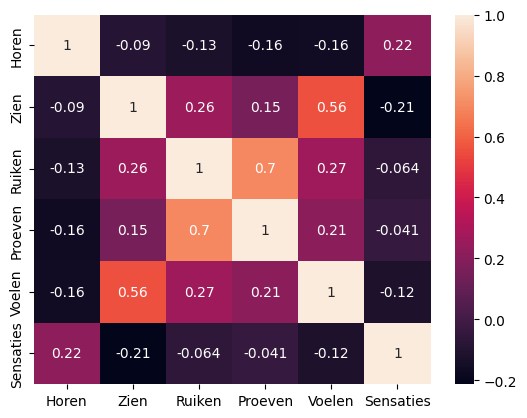

In [150]:
hm = sns.heatmap(X.corr(),annot=True)

In [151]:
X.corr()

,Horen,Zien,Ruiken,Proeven,Voelen,Sensaties
Horen,1.000000,-0.090255,-0.126828,-0.162467,-0.156464,0.219187
Zien,-0.090255,1.000000,0.256869,0.153960,0.558252,-0.213318
Ruiken,-0.126828,0.256869,1.000000,0.697768,0.266620,-0.064437
Proeven,-0.162467,0.153960,0.697768,1.000000,0.212626,-0.041444
Voelen,-0.156464,0.558252,0.266620,0.212626,1.000000,-0.119524
Sensaties,0.219187,-0.213318,-0.064437,-0.041444,-0.119524,1.000000


In [153]:
results1 = smf.ols('Concreteness ~ Zien' , data=df_du).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Concreteness   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                 2.246e+04
Date:                Mon, 30 Jun 2025   Prob (F-statistic):               0.00
Time:                        02:30:45   Log-Likelihood:                -26646.
No. Observations:               24036   AIC:                         5.330e+04
Df Residuals:                   24034   BIC:                         5.331e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2471      0.013     97.835      0.000       1.222       1.272
Zien           0.6708      0.004    149.861      0.000       0.662       0.680
==============================================================================
Omnibus:                      171.175   Durbin-Watson:                   1.474
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.698
Skew:                           0.200   Prob(JB):                     3.16e-38
Kurtosis:                       2.886   Cond. No.                         8.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Prob(JB):	3.16e-38

гипотезу о нормальности принять не можем, когда много параметров сложно говорить о нормальном разспределении для остатков


Для этой задачи можем построить только описательную модель, но не предиктивную

In [154]:
resultsm = smf.ols('Concreteness ~ Horen + Zien + Ruiken + Proeven + Voelen + Sensaties' , data=df_du).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Concreteness   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     6550.
Date:                Mon, 30 Jun 2025   Prob (F-statistic):               0.00
Time:                        02:31:08   Log-Likelihood:                -22929.
No. Observations:               24036   AIC:                         4.587e+04
Df Residuals:                   24029   BIC:                         4.593e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6156      0.013    121.517      0.000       1.590       1.642
Horen          0.0501      0.004     11.771      0.000       0.042       0.058
Zien           0.4269      0.005     89.824      0.000       0.418       0.436
Ruiken         0.1921      0.009     22.478      0.000       0.175       0.209
Proeven        0.0630      0.007      8.517      0.000       0.049       0.078
Voelen         0.3208      0.005     64.211      0.000       0.311       0.331
Sensaties     -0.2374      0.005    -47.037      0.000      -0.247      -0.228
==============================================================================
Omnibus:                      197.913   Durbin-Watson:                   1.559
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.048
Skew:                           0.204   Prob(JB):                     6.65e-46
Kurtosis:                       3.203   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [155]:
LR = lm.LinearRegression()

In [156]:
mod_m = LR.fit(X,Y)
mod_m.intercept_, mod_m.coef_

(array([1.6155862]),
 array([[ 0.05007727,  0.42692991,  0.19210296,  0.06301922,  0.32078267,
         -0.23740935]]))

In [157]:
r2 = mod_m.score(X,Y)
r2

0.6205650810710623

array([[<Axes: title={'center': 'Concreteness'}>]], dtype=object)

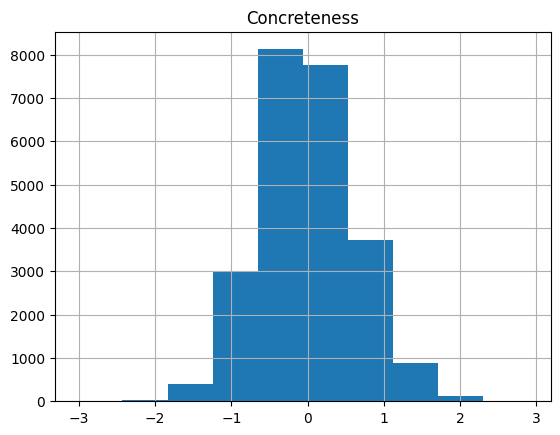

In [ ]:
Y_pred = mod_m.predict(X)
res=Y-Y_pred
res.hist()

если остатки хотя бы симметричные, то модель не очень плоха

почти как стандартное нормальное распределение получается

In [159]:
X_full = df_du[['Horen', 'Zien', 'Ruiken', 'Proeven', 'Voelen', 'Sensaties', 'Prevalence', 'Length', 'Frequency']]

mod_m_full = LR.fit(X_full, Y)

r2_full = mod_m_full.score(X_full, Y)
r2_full

0.6333226263706343

In [161]:
r2_full - r2

0.01275754529957196